<a href="https://colab.research.google.com/github/gopalchettri/DeepLearning/blob/master/1_c_Loss_Functions_in_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**MSE in a Neural Network**

Training MSE: 400.83
Test MSE: 446.69
Training R^2: 0.38
Test R^2: 0.35


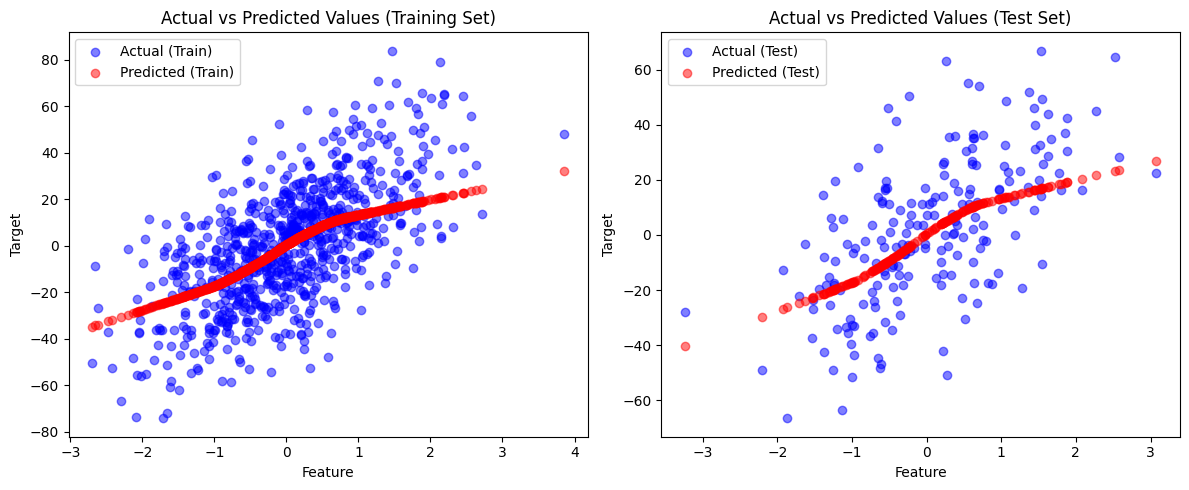

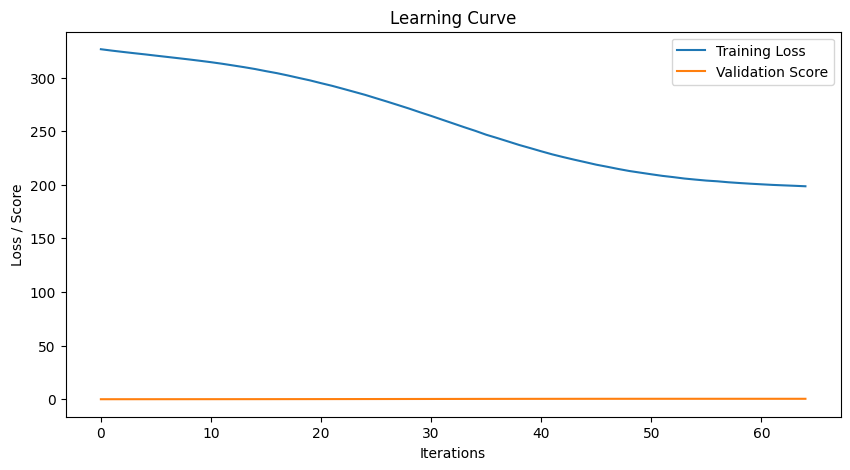

In [1]:
# Import necessary libraries
import numpy as np  # For numerical operations
import matplotlib.pyplot as plt  # For plotting graphs
from sklearn.datasets import make_regression  # To generate synthetic regression data
from sklearn.model_selection import train_test_split  # To split data into training and testing sets
from sklearn.neural_network import MLPRegressor  # To create a neural network regressor model
from sklearn.metrics import mean_squared_error, r2_score  # To evaluate the model's performance
from sklearn.preprocessing import StandardScaler  # To scale features for better model performance

# Generate synthetic regression data with 1000 samples, 1 feature, and noise level of 20
X, y = make_regression(n_samples=1000, n_features=1, noise=20, random_state=42)

# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the scaler for feature scaling
scaler = StandardScaler()

# Fit the scaler on training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the same scaler
X_test_scaled = scaler.transform(X_test)

# Create a Multi-layer Perceptron regressor with two hidden layers (50 and 25 neurons)
# Use ReLU activation, Adam optimizer, and early stopping to prevent overfitting
mlp = MLPRegressor(hidden_layer_sizes=(50, 25), max_iter=1000,
                   activation='relu', solver='adam', random_state=42,
                   learning_rate_init=0.001, early_stopping=True)

# Train the neural network model on the scaled training data
mlp.fit(X_train_scaled, y_train)

# Predict target values for training data
y_pred_train = mlp.predict(X_train_scaled)

# Predict target values for test data
y_pred_test = mlp.predict(X_test_scaled)

# Calculate Mean Squared Error for training predictions
mse_train = mean_squared_error(y_train, y_pred_train)

# Calculate Mean Squared Error for test predictions
mse_test = mean_squared_error(y_test, y_pred_test)

# Calculate R-squared score for training predictions
r2_train = r2_score(y_train, y_pred_train)

# Calculate R-squared score for test predictions
r2_test = r2_score(y_test, y_pred_test)

# Print the evaluation metrics
print(f"Training MSE: {mse_train:.2f}")
print(f"Test MSE: {mse_test:.2f}")
print(f"Training R^2: {r2_train:.2f}")
print(f"Test R^2: {r2_test:.2f}")

# Plot actual vs predicted values for training and test sets
plt.figure(figsize=(12, 5))

# Plot for training set
plt.subplot(1, 2, 1)
plt.scatter(X_train, y_train, color='blue', alpha=0.5, label='Actual (Train)')
plt.scatter(X_train, y_pred_train, color='red', alpha=0.5, label='Predicted (Train)')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.title('Actual vs Predicted Values (Training Set)')
plt.legend()

# Plot for test set
plt.subplot(1, 2, 2)
plt.scatter(X_test, y_test, color='blue', alpha=0.5, label='Actual (Test)')
plt.scatter(X_test, y_pred_test, color='red', alpha=0.5, label='Predicted (Test)')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.title('Actual vs Predicted Values (Test Set)')
plt.legend()

plt.tight_layout()
plt.show()

# Plot the learning curve showing training loss and validation score over iterations
plt.figure(figsize=(10, 5))
plt.plot(mlp.loss_curve_, label='Training Loss')
plt.plot(mlp.validation_scores_, label='Validation Score')
plt.xlabel('Iterations')
plt.ylabel('Loss / Score')
plt.title('Learning Curve')
plt.legend()
plt.show()


**Binary Cross-Entropy in Neural Networks**

Binary Cross-Entropy Loss: 0.3128
Accuracy: 0.9250

Confusion Matrix:
[[102   2]
 [ 13  83]]

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.98      0.93       104
           1       0.98      0.86      0.92        96

    accuracy                           0.93       200
   macro avg       0.93      0.92      0.92       200
weighted avg       0.93      0.93      0.92       200


Model Training Information:
Number of iterations: 32
Final training loss: 0.1620
Training converged: True


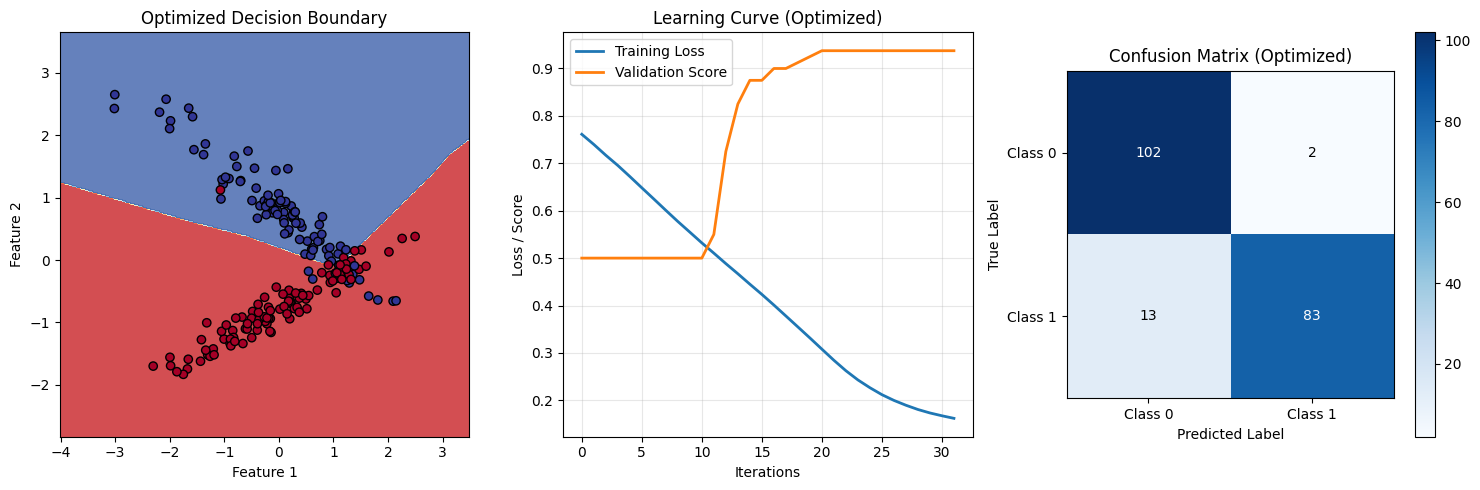

In [4]:
# Import necessary libraries for numerical operations, plotting, and machine learning
import numpy as np  # For numerical computations and array operations
import matplotlib.pyplot as plt  # For creating plots and visualizations
from sklearn.datasets import make_classification  # For generating synthetic classification datasets
from sklearn.model_selection import train_test_split  # For splitting data into train/test sets
from sklearn.neural_network import MLPClassifier  # Multi-layer Perceptron classifier implementation
from sklearn.metrics import accuracy_score, log_loss, confusion_matrix, classification_report  # For model evaluation metrics
from sklearn.preprocessing import StandardScaler  # For feature scaling/normalization

# Generate synthetic binary classification data with specified parameters
X, y = make_classification(n_samples=1000,  # Create 1000 data points
                          n_features=2,  # Use 2 features for easy visualization
                          n_classes=2,  # Binary classification (2 classes)
                          n_clusters_per_class=1,  # One cluster per class
                          n_redundant=0,  # No redundant features
                          n_informative=2,  # Both features are informative
                          random_state=42)  # Set random seed for reproducibility

# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y,  # Input features and target labels
                                                    test_size=0.2,  # 20% for testing
                                                    random_state=42)  # Random seed for consistent splits

# Initialize StandardScaler to normalize features (mean=0, std=1)
scaler = StandardScaler()
# Fit scaler on training data and transform training features
X_train_scaled = scaler.fit_transform(X_train)
# Transform test features using the same scaling parameters from training
X_test_scaled = scaler.transform(X_test)

# Create an optimized Multi-Layer Perceptron (neural network) classifier
mlp = MLPClassifier(hidden_layer_sizes=(10, 5),  # Two hidden layers with 10 and 5 neurons respectively
                    activation='relu',  # ReLU activation function for hidden layers
                    max_iter=1000,  # Maximum number of training iterations
                    solver='adam',  # Adam optimizer for weight updates (aligns with your optimizer expertise)
                    random_state=42,  # Random seed for weight initialization
                    early_stopping=True,  # Stop training if validation score stops improving
                    validation_fraction=0.1,  # Use 10% of training data for validation
                    learning_rate_init=0.005,  # Optimized learning rate (reduced from default 0.001)
                    alpha=0.001)  # Added L2 regularization to prevent overfitting

# Train the neural network model on scaled training data
mlp.fit(X_train_scaled, y_train)

# Generate probability predictions for the positive class (class 1)
y_pred_prob = mlp.predict_proba(X_test_scaled)[:, 1]  # Extract probabilities for class 1
# Generate binary class predictions (0 or 1)
y_pred = mlp.predict(X_test_scaled)

# Calculate binary cross-entropy loss using predicted probabilities
logloss = log_loss(y_test, y_pred_prob)
# Calculate accuracy score comparing true and predicted labels
accuracy = accuracy_score(y_test, y_pred)
# Generate confusion matrix showing true vs predicted classifications
conf_matrix = confusion_matrix(y_test, y_pred)

# Print evaluation metrics to console with detailed debugging information
print(f"Binary Cross-Entropy Loss: {logloss:.4f}")  # Display log loss with 4 decimal places
print(f"Accuracy: {accuracy:.4f}")  # Display accuracy with 4 decimal places
print("\nConfusion Matrix:")  # Print newline and confusion matrix label
print(conf_matrix)  # Display the 2x2 confusion matrix
print("\nClassification Report:")  # Print newline and classification report label
print(classification_report(y_test, y_pred))  # Display precision, recall, F1-score for each class

# Additional debugging information for model performance analysis
print(f"\nModel Training Information:")  # Print model training details
print(f"Number of iterations: {mlp.n_iter_}")  # Show actual iterations used
print(f"Final training loss: {mlp.loss_:.4f}")  # Display final training loss
print(f"Training converged: {mlp.n_iter_ < mlp.max_iter}")  # Check if training converged

# Define function to plot decision boundary of the trained model
def plot_decision_boundary(X, y, model, ax=None):
    h = .02  # Set step size for creating prediction mesh grid
    # Find min/max values for x-axis with padding of 1 unit
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    # Find min/max values for y-axis with padding of 1 unit
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    # Create coordinate matrices for the entire plot area
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Make predictions for every point in the mesh grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    # Reshape predictions to match the mesh grid shape
    Z = Z.reshape(xx.shape)
    # Use current axes if none specified
    if ax is None:
        ax = plt.gca()
    # Plot filled contours showing decision regions with transparency
    ax.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.RdYlBu)
    # Scatter plot of actual data points colored by true class
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu, edgecolor='black')
    # Set x-axis label
    ax.set_xlabel('Feature 1')
    # Set y-axis label
    ax.set_ylabel('Feature 2')
    # Return the axes object
    return ax

# Create a figure with 3 subplots arranged horizontally
plt.figure(figsize=(15, 5))  # Set figure size to 15x5 inches

# First subplot: Decision boundary visualization
plt.subplot(131)  # Select first subplot (1 row, 3 columns, position 1)
plot_decision_boundary(X_test_scaled, y_test, mlp)  # Plot decision boundary on test data
plt.title('Optimized Decision Boundary')  # Set title for decision boundary plot

# Second subplot: Learning curves with enhanced visualization
plt.subplot(132)  # Select second subplot (1 row, 3 columns, position 2)
plt.plot(mlp.loss_curve_, label='Training Loss', linewidth=2)  # Plot training loss over iterations
plt.plot(mlp.validation_scores_, label='Validation Score', linewidth=2)  # Plot validation accuracy over iterations
plt.xlabel('Iterations')  # Set x-axis label
plt.ylabel('Loss / Score')  # Set y-axis label
plt.title('Learning Curve (Optimized)')  # Set title for learning curve plot
plt.legend()  # Display legend to distinguish between lines
plt.grid(True, alpha=0.3)  # Add grid for better readability

# Third subplot: Enhanced confusion matrix heatmap
plt.subplot(133)  # Select third subplot (1 row, 3 columns, position 3)
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)  # Display confusion matrix as heatmap
plt.title('Confusion Matrix (Optimized)')  # Set title for confusion matrix
plt.colorbar()  # Add color scale bar
tick_marks = np.arange(2)  # Create tick marks for 2 classes
plt.xticks(tick_marks, ['Class 0', 'Class 1'])  # Set x-axis tick labels
plt.yticks(tick_marks, ['Class 0', 'Class 1'])  # Set y-axis tick labels
plt.xlabel('Predicted Label')  # Set x-axis label
plt.ylabel('True Label')  # Set y-axis label

# Add text annotations to confusion matrix for better readability
for i in range(2):  # Loop through confusion matrix dimensions
    for j in range(2):  # Loop through confusion matrix dimensions
        plt.text(j, i, conf_matrix[i, j],  # Add text showing actual values
                ha="center", va="center", color="white" if conf_matrix[i, j] > conf_matrix.max()/2 else "black")

# Adjust subplot spacing to prevent overlap
plt.tight_layout()
# Display all plots
plt.show()
